# 20250130 / 데이터 전처리 및 EDA

In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 1. 데이터 로드

In [3]:
data = pd.read_csv('Shein.csv')

In [4]:
print("데이터 크기:", data.shape)
print(data.head())

데이터 크기: (40500, 8)
                               reviewId  \
0  9f73e569-bb36-4c35-a5c2-5412a3e32cc6   
1  731ca074-021f-40fa-a66e-bf7d55702450   
2  feab6570-16c8-4157-933c-1af2a55193ce   
3  32155d73-a4b5-4038-9ed5-9018c40acfb7   
4  25316898-663a-4a52-ba0d-38b32335c499   

                                             content  score  thumbsUpCount  \
0  I have bought all my clothes from shein for th...      5            323   
1  PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...      1            215   
2  Great app for shopping, but I love shein it's ...      2            160   
3  Update: one item out of 5 in order recently re...      3             20   
4  Nice app to buy hair accessories, summer dress...      4           7630   

              at                                       replyContent  \
0  1723348459000                                                NaN   
1  1723359459000  Hi! Hope you have a nice shopping experience h...   
2  1722911026000  Hi! Hope you have a ni

### 2. 데이터 정보 확인

- 데이터 결측치 / 타입 / 요약 정보 확인

In [5]:
data.head()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewId       40500 non-null  object 
 1   content        40500 non-null  object 
 2   score          40500 non-null  int64  
 3   thumbsUpCount  40500 non-null  int64  
 4   at             40500 non-null  int64  
 5   replyContent   11210 non-null  object 
 6   repliedAt      11210 non-null  float64
 7   appName        40500 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.5+ MB


### 3. 데이터 클린징

- 결측치 있는 행 제거
- reviewId, at, repliedAt 열 제거
- 중복 데이터 제거

In [6]:
data.dropna(inplace=True)

data.drop(['reviewId', 'at', 'repliedAt'], axis=1, inplace=True)

data.drop_duplicates(inplace=True)

In [7]:
print("열 제거 후 데이터 크기:", data.shape)
print(data.head())

열 제거 후 데이터 크기: (11208, 5)
                                              content  score  thumbsUpCount  \
1   PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...      1            215   
2   Great app for shopping, but I love shein it's ...      2            160   
6   It used to be a great shopping app, but now fo...      1            295   
8   It's a really good app overall, but I have a f...      3              6   
10  The clothes I've gotten from shein are fine. T...      2              1   

                                         replyContent appName  
1   Hi! Hope you have a nice shopping experience h...   Shein  
2   Hi! Hope you have a nice shopping experience h...   Shein  
6   Hi! Hope you have a nice shopping experience h...   Shein  
8   Hi! Hope you have a nice shopping experience h...   Shein  
10  Hi! Hope you have a nice shopping experience h...   Shein  


#### 텍스트 전처리

In [8]:
print("전처리 전 첫 5개 리뷰 내용:")
print(data['content'].head())

전처리 전 첫 5개 리뷰 내용:
1     PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...
2     Great app for shopping, but I love shein it's ...
6     It used to be a great shopping app, but now fo...
8     It's a really good app overall, but I have a f...
10    The clothes I've gotten from shein are fine. T...
Name: content, dtype: object


- 소문자 변환 / 특수 문자 제거 / 공백 여러 칸 -> 공백 한 칸으로 변경

In [9]:
import re

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-z\s]', '', text) 
    text = re.sub(r'\s+', ' ', text) 
    return text

data['content'] = data['content'].apply(clean_text)
data['replyContent'] = data['replyContent'].apply(clean_text)

In [10]:
print("전처리 후 첫 5개 리뷰 내용:")
print(data['content'].head())

전처리 후 첫 5개 리뷰 내용:
1     please stop it with the popup offers you make ...
2     great app for shopping but i love shein its on...
6     it used to be a great shopping app but now for...
8     its a really good app overall but i have a few...
10    the clothes ive gotten from shein are fine thi...
Name: content, dtype: object


### 4. 탐색적 데이터 분석 (EDA)

- 한글 & 마이너스 기호 깨짐 방지 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

- 리뷰 점수 분포 확인

C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


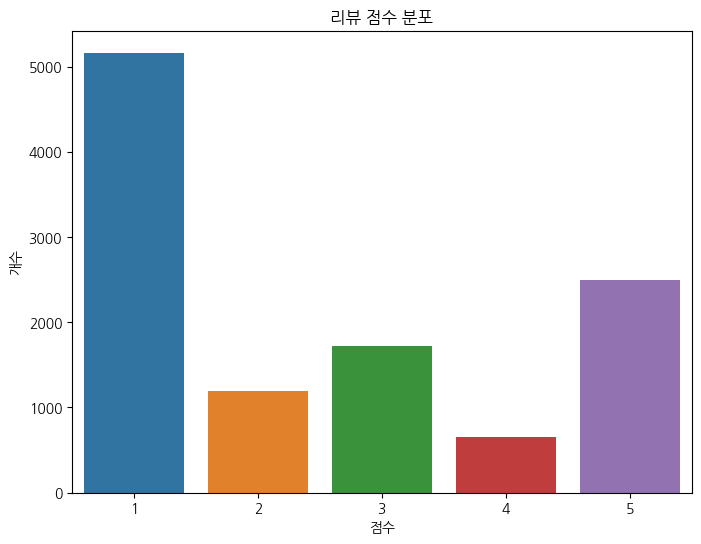

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=data)
plt.title('리뷰 점수 분포')
plt.xlabel('점수')
plt.ylabel('개수')
plt.show()

- thumbsUpCount 점수별 평균

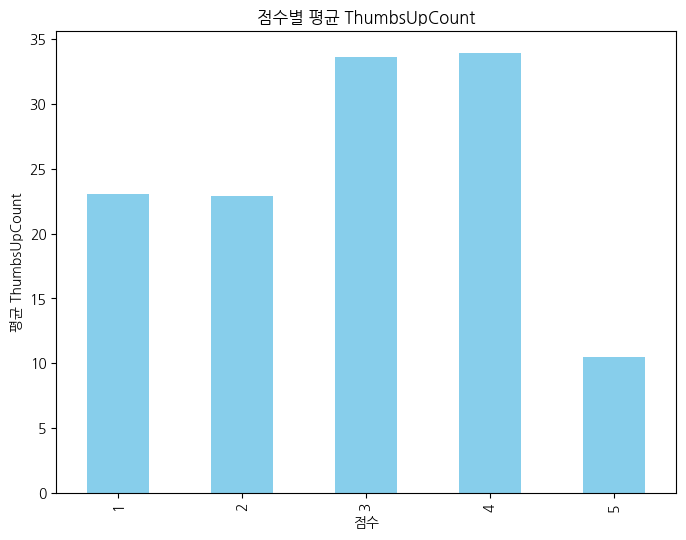

In [13]:
avg_thumbs = data.groupby('score')['thumbsUpCount'].mean()
avg_thumbs.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('점수별 평균 ThumbsUpCount')
plt.xlabel('점수')
plt.ylabel('평균 ThumbsUpCount')
plt.show()

- 리뷰 내용에 대한 워드클라우드 생성

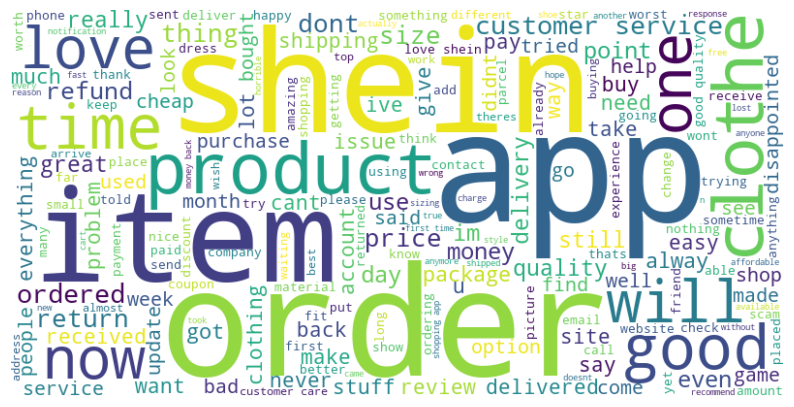

In [14]:
all_reviews = ' '.join(data['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- ThumbsUpCount와 점수 간의 관계

C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jes45\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


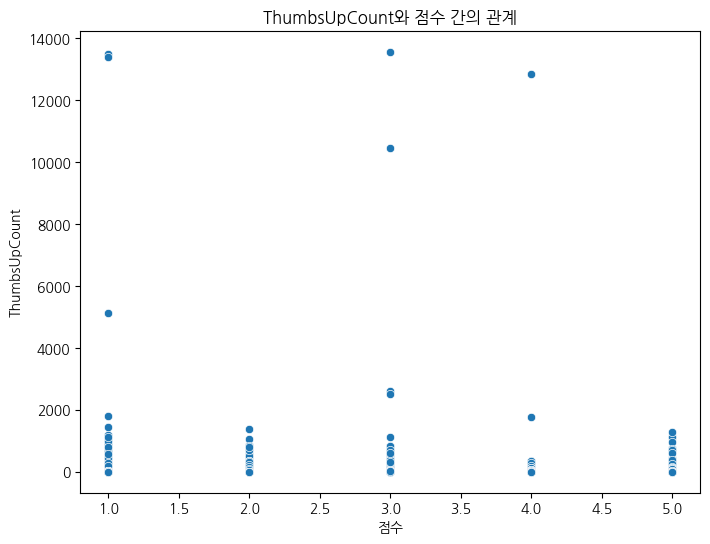

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='thumbsUpCount', data=data)
plt.title('ThumbsUpCount와 점수 간의 관계')
plt.xlabel('점수')
plt.ylabel('ThumbsUpCount')
plt.show()

### 5. 긍정/부정 감정 특성 추가

- 점수에 따라 긍정적/부정적 감정을 나타내는 특성 추가

In [16]:
data['sentiment'] = data['score'].apply(lambda x: 'positive' if x >= 4 else 'negative')